# **Mid Course Assessment - ML Case Study**

## **Project Name:** Credit Scoring (Banking & Financial Services)  
## **Project Type**    - Supervised Classification - AUC-ROC

# **Project Summary**

This project aims to develop a machine learning-based credit scoring system for a financial institution to classify customers into three credit risk categories: Good, Poor, or Standard. By leveraging historical financial behavior, loan history, and demographic data, the solution seeks to replace traditional, error-prone methods with a dynamic, interpretable model that improves risk assessment accuracy, reduces defaults, and enables personalized financial services.

# **Problem Statement**

In the banking sector, accurate credit scoring is vital to mitigate default risks, optimize lending strategies, and comply with regulations. Traditional methods often fail to capture dynamic customer behavior, leading to suboptimal decisions.

The model will be evaluated using the AUC-ROC score to ensure high classification performance, and it will ultimately help banks and financial institutions make smarter decisions, reduce financial risk, and offer better customer service.

# **Objective**

The main objective is to build a predictive model that can classify individuals into different credit score categories (e.g., Bad, Standard, Good) based on the available features. This can assist lenders in making informed decisions regarding credit approvals and risk management.

# **Data Description**

This dataset contains financial and credit-related information for customers, including details about their income, loans, credit behavior, and credit score classification. Below is a structured breakdown of the data:

* ID : Unique identifier for each entry.

* Customer_ID : Unique identifier for each customer.

* Month : The month when the data was recorded.

* Name : Customer's name.

* Age : Customer's age.

* SSN : Social Security Number of the customer.

* Occupation : Customer’s profession.

* Annual_Income : Total yearly income of the customer.

* Monthly_Inhand_Salary : Net salary received per month after deductions.

* Num_Bank_Accounts : Total number of bank accounts held by the customer.

* Num_Credit_Card : Number of credit cards owned.

* Interest_Rate : Interest rate applied to loans or credits.

* Num_of_Loan : Number of loans taken by the customer.

* Type_of_Loan : Types of loans the customer has.

* Delay_from_due_date : Number of days a payment has been delayed beyond the due date.

* Num_of_Delayed_Payment : Total number of times the customer has delayed a payment.

* Changed_Credit_Limit : Any changes made to the customer's credit limit.

* Num_Credit_Inquiries : Number of times the customer’s credit history was checked.

* Credit_Mix : Composition of various types of credit accounts held by the customer.

* Outstanding_Debt : Total outstanding debt the customer owes.

* Credit_Utilization_Ratio : Ratio of utilized credit to the total available credit.

* Credit_History_Age : Length of the customer’s credit history.

* Payment_of_Min_Amount : Indicates if the customer has paid at least the minimum due amount.

* Total_EMI_per_month : Total Equated Monthly Installment (EMI) paid per month.

* Amount_invested_monthly : Monthly investment by the customer.

* Payment_Behaviour : Pattern of payments made by the customer.

* Monthly_Balance : Available balance in the customer’s account per month.

* Credit_Score (Target Variable) : The customer's credit score categorized as: (Good, Standard, Poor)

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd # Data cleaning
import numpy as np #
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime
import missingno as msno
#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Loading CreditScroing- Train Dataset
df_train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Module: Machine Learning/Mid Course Assessment - ML Case Study/train.csv")

In [120]:
#Dataset First View
df_train.head(10)

ID Customer_ID     Month             Name   Age          SSN  \
0  0x1602   CUS_0xd40   January    Aaron Maashoh    23  821-00-0265   
1  0x1603   CUS_0xd40  February    Aaron Maashoh    23  821-00-0265   
2  0x1604   CUS_0xd40     March    Aaron Maashoh  -500  821-00-0265   
3  0x1605   CUS_0xd40     April    Aaron Maashoh    23  821-00-0265   
4  0x1606   CUS_0xd40       May    Aaron Maashoh    23  821-00-0265   
5  0x1607   CUS_0xd40      June    Aaron Maashoh    23  821-00-0265   
6  0x1608   CUS_0xd40      July    Aaron Maashoh    23  821-00-0265   
7  0x1609   CUS_0xd40    August              NaN    23    #F%$D@*&8   
8  0x160e  CUS_0x21b1   January  Rick Rothackerj   28_  004-07-5839   
9  0x160f  CUS_0x21b1  February  Rick Rothackerj    28  004-07-5839   

  Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0  Scientist      19114.12            1824.843333                  3  ...   
1  Scientist      19114.12                    NaN                  3  ...   
2  Scientist      19114.12                    NaN                  3  ...   
3  Scientist      19114.12                    NaN                  3  ...   
4  Scientist      19114.12            1824.843333                  3  ...   
5  Scientist      19114.12                    NaN                  3  ...   
6  Scientist      19114.12            1824.843333                  3  ...   
7  Scientist      19114.12            1824.843333                  3  ...   
8    _______      34847.84            3037.986667                  2  ...   
9    Teacher      34847.84            3037.986667                  2  ...   

   Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0           _            809.98                26.822620   
1        Good            809.98                31.944960   
2        Good            809.98                28.609352   
3        Good            809.98                31.377862   
4        Good            809.98                24.797347   
5        Good            809.98                27.262259   
6        Good            809.98                22.537593   
7        Good            809.98                23.933795   
8        Good            605.03                24.464031   
9        Good            605.03                38.550848   

      Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0  22 Years and 1 Months                     No           49.574949   
1                    NaN                     No           49.574949   
2  22 Years and 3 Months                     No           49.574949   
3  22 Years and 4 Months                     No           49.574949   
4  22 Years and 5 Months                     No           49.574949   
5  22 Years and 6 Months                     No           49.574949   
6  22 Years and 7 Months                     No           49.574949   
7                    NaN                     No           49.574949   
8  26 Years and 7 Months                     No           18.816215   
9  26 Years and 8 Months                     No           18.816215   

  Amount_invested_monthly                 Payment_Behaviour  \
0       80.41529543900253   High_spent_Small_value_payments   
1      118.28022162236736    Low_spent_Large_value_payments   
2         81.699521264648   Low_spent_Medium_value_payments   
3       199.4580743910713    Low_spent_Small_value_payments   
4      41.420153086217326  High_spent_Medium_value_payments   
5      62.430172331195294                            !@9#%8   
6       178.3440674122349    Low_spent_Small_value_payments   
7      24.785216509052056  High_spent_Medium_value_payments   
8        104.291825168246    Low_spent_Small_value_payments   
9       40.39123782853101   High_spent_Large_value_payments   

      Monthly_Balance Credit_Score  
0  312.49408867943663         Good  
1  284.62916249607184         Good  
2   331.2098628537912         Good  
3  223.45130972736786         Good  
4  341.48923103222177         Good  
5   340.4792117872

In [ ]:
df_train.tail(10)

In [4]:
# Dataset Rows & Columns count
df_train.shape

(100000, 28)

* Dataset having 100000 observations and 28 columns.

In [121]:
# Basic information of dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

* In the dataset, there are object, float64, and int64 dtypes features present.

In [ ]:
# Dataset Duplicate Value Count
count_duplicated =df_train.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values.')

Dataset having 0 duplicated values.


In [122]:
df_train.describe(exclude=np.number).T

count  unique                               top  \
ID                       100000  100000                           0x25fd5   
Customer_ID              100000   12500                        CUS_0x942c   
Month                    100000       8                           January   
Name                      90015   10139                            Stevex   
Age                      100000    1788                                38   
SSN                      100000   12501                         #F%$D@*&8   
Occupation               100000      16                           _______   
Annual_Income            100000   18940                          36585.12   
Num_of_Loan              100000     434                                 3   
Type_of_Loan              88592    6260                     Not Specified   
Num_of_Delayed_Payment    92998     749                                19   
Changed_Credit_Limit     100000    4384                                 _   
Credit_Mix               100000       4                          Standard   
Outstanding_Debt         100000   13178                           1360.45   
Credit_History_Age        90970     404            15 Years and 11 Months   
Payment_of_Min_Amount    100000       3                               Yes   
Amount_invested_monthly   95521   91049                         __10000__   
Payment_Behaviour        100000       7    Low_spent_Small_value_payments   
Monthly_Balance           98800   98792  __-333333333333333333333333333__   
Credit_Score             100000       3                          Standard   

                          freq  
ID                           1  
Customer_ID                  8  
Month                    12500  
Name                        44  
Age                       2833  
SSN                       5572  
Occupation                7062  
Annual_Income               16  
Num_of_Loan              14386  
Type_of_Loan              1408  
Num_of_Delayed_Payment    5327  
Changed_Credit_Limit      2091  
Credit_Mix               36479  
Outstanding_Debt            24  
Credit_History_Age         446  
Payment_of_Min_Amount    52326  
Amount_invested_monthly   4305  
Payment_Behaviour        25513  
Monthly_Balance              9  
Credit_Score             53174

In [123]:
# Missing Values/Null Values Count
df_train.isnull().sum().sort_values(ascending=False)

Monthly_Inhand_Salary       15002
Type_of_Loan                11408
Name                         9985
Credit_History_Age           9030
Num_of_Delayed_Payment       7002
Amount_invested_monthly      4479
Num_Credit_Inquiries         1965
Monthly_Balance              1200
Month                           0
Age                             0
Customer_ID                     0
ID                              0
Interest_Rate                   0
Num_Credit_Card                 0
Num_Bank_Accounts               0
Annual_Income                   0
SSN                             0
Occupation                      0
Delay_from_due_date             0
Num_of_Loan                     0
Outstanding_Debt                0
Credit_Mix                      0
Changed_Credit_Limit            0
Credit_Utilization_Ratio        0
Total_EMI_per_month             0
Payment_of_Min_Amount           0
Payment_Behaviour               0
Credit_Score                    0
dtype: int64

<Axes: >

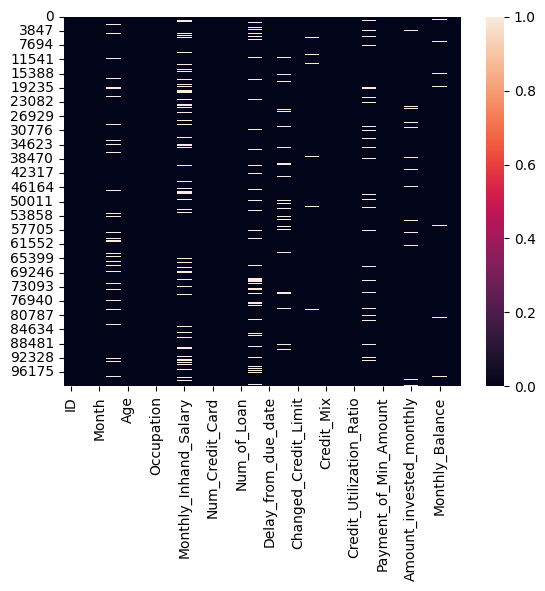

In [124]:
#visual missning vaules chart
sns.heatmap(df_train.isnull())

In [ ]:
#pd.DataFrame({'Count': df_train.count(),'Null': df_train.isnull().sum(),'Cardinality': df_train.nunique()})

In [4]:
# create new data frame from original dataset for further data cleaning and analysis.
df = df_train.copy()

* **Dataset copy after handle missing values, null entries and change dType**

In [ ]:
df.head(10)

### **Cleaning Data**

In [5]:
# _______ #_  # !@9#%8 # __10000__  # __-333333333333333333333333333__  this type erroes data problem solve
# List of columns that may contain underscore errors
columns_to_fix = ['Annual_Income', "Age", 'Num_of_Loan', 'Num_of_Delayed_Payment',
                  "Changed_Credit_Limit", "Outstanding_Debt", "Amount_invested_monthly",
                  "Monthly_Balance", "SSN"]
# Fix common invalid string errors
df['Occupation'] = df['Occupation'].replace('_______', np.nan)
df['SSN'] = df['SSN'].replace('#F%$D@*&8', np.nan)  # Replace with NaN
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].replace('__10000__', np.nan)  # Replace with NaN
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8', np.nan)  # Replace with NaN
df['Credit_Mix'] = df['Credit_Mix'].replace('_', np.nan)  # Replace with NaN

df['Monthly_Balance'].replace("__-333333333333333333333333333__",np.nan)

# Remove underscores and convert data back to original type
for column in columns_to_fix:
    df[column] = df[column].astype(str).str.replace('_', '', regex=True)  # Convert to string, remove '_'
    # Convert back to numeric
    # Not convert to this 'SSN' numeric
    # df[['Annual_Income', 'Num_of_Delayed_Payment', "Changed_Credit_Limit", "Outstanding_Debt", "Amount_invested_monthly","Monthly_Balance"]]= float
    if column != "SSN":
        df[column] = pd.to_numeric(df[column], errors='coerce')  # to_numeric() - Convert back to float or int


In [119]:
df.describe(exclude=np.number).T

count unique                             top   freq
Month                  100000      8                         January  12500
Occupation             100000     15                          Lawyer   7096
Type_of_Loan           100000   6260                   Not Specified  12816
Credit_Mix             100000      3                        Standard  45848
Payment_of_Min_Amount  100000      3                             Yes  52326
Payment_Behaviour      100000      7  Low_spent_Small_value_payments  25513
Credit_Score           100000      3                        Standard  53174

In [6]:
is_null_sum = df.isnull().sum()[lambda x:x > 0]
# Calculate the number of missing values in each column
missing_values = df.isnull().sum()
# Calculate the total number of values in each column
total_values = df.count() + missing_values
# Calculate the percentage of missing values in each column
percentage_missing = (missing_values / total_values) * 100
# Print the results
#print(f"{df.isnull().sum().sort_values(ascending=False)},{percentage_missing.sort_values(ascending=False)}")

In [127]:
pd.DataFrame({"IS Null Sum" : is_null_sum ,"percentage_missing %": percentage_missing[lambda x:x > 0]})

IS Null Sum  percentage_missing %
Name                            9985                 9.985
Occupation                      7062                 7.062
Monthly_Inhand_Salary          15002                15.002
Type_of_Loan                   11408                11.408
Num_of_Delayed_Payment          7002                 7.002
Changed_Credit_Limit            2091                 2.091
Num_Credit_Inquiries            1965                 1.965
Credit_Mix                     20195                20.195
Credit_History_Age              9030                 9.030
Amount_invested_monthly         8784                 8.784
Payment_Behaviour               7600                 7.600
Monthly_Balance                 1200                 1.200

### **Handle missing values**

In [7]:
#Fill missing Occupation values within each Customer_ID group using the most frequent value (mode)
df['Occupation'] = df.groupby('Customer_ID')['Occupation'].transform(lambda x: x.fillna(x.mode()[0]))

#Fill missing Monthly_Inhand_Salary values within each Customer_ID group using the most frequent value (mode)
df['Monthly_Inhand_Salary']=df.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda x: x.fillna(x.mode()[0]))

#Fill missing Credit_Mix values within each Customer_ID group using the most frequent value (mode)
df['Credit_Mix']= df.groupby('Customer_ID')['Credit_Mix'].transform(lambda x: x.fillna(x.mode()[0]))

#Fill missing Changed_Credit_Limit values within each Customer_ID group using the most frequent value (mode)
df['Changed_Credit_Limit'] = df.groupby('Customer_ID')['Changed_Credit_Limit'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.median()))

#Fill missing Num_of_Delayed_Payment values within each Customer_ID group using the most frequent value (mode)
df['Num_of_Delayed_Payment']=df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda x: x.fillna(x.mode()[0]))

#
df['Type_of_Loan'].fillna('Not Specified', inplace=True)
#
df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly'].mean(), inplace=True)
#
df['Num_Credit_Inquiries'].fillna(method='ffill',inplace=True)
#
df['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].median(), inplace=True)
#
df['Monthly_Balance'].fillna(df['Monthly_Balance'].mean(), inplace=True)
#
df['Payment_Behaviour'].fillna('Not Specified', inplace=True)

In [9]:
# Convert Credit_History_Age to month
def convert_to_months(val):
    if pd.notnull(val):
        years = int(val.split(' ')[0])
        months = int(val.split(' ')[3])
        return (years * 12) + months
    return val

In [10]:
df['Credit_History_Month_Age'] = df['Credit_History_Age'].apply(lambda x: convert_to_months(x)).astype(float)
# Fill missing values in total months
#df[['Customer_ID','Credit_History_Month_Age']].head(20)

In [11]:
# Base value to start filling for new customers
base_value = 0

# Function to fix each customer group
def fix_credit_history(cust_group):
    global base_value
    if cust_group['Credit_History_Month_Age'].isna().all():
        # All values are NaN → new customer
        cust_group['Credit_History_Month_Age'] = np.arange(base_value, base_value + len(cust_group))
        base_value += len(cust_group)
    else:
        # Interpolate and fill for existing customers
        cust_group['Credit_History_Month_Age'] = cust_group['Credit_History_Month_Age'].interpolate(method='linear')
        cust_group['Credit_History_Month_Age'].fillna(method='ffill', inplace=True)
        cust_group['Credit_History_Month_Age'].fillna(method='bfill', inplace=True)
    return cust_group

# Apply to grouped DataFrame
df = df.groupby('Customer_ID', group_keys=False).apply(fix_credit_history)
#df.drop('Credit_History_Age', inplace=True)

In [ ]:
df[['Customer_ID','Credit_History_Month_Age']].head(10)

### **Remove Outlier data visual**

**Column=['Age', 'Num_Bank_Accounts', 'Num_Credit_Card' ,'Interest_Rate' ,'Num_of_Loan','Num_of_Delayed_Payment','Num_Credit_Inquiries']**

In [12]:
# Remove Outlier data like -500 , 95,99,100...
#Apply to nan data after groupby using customer_id and age columns check using lambda () using mode data and mode empty after median data add.

#df['Age'] = df['Age'].apply(lambda x: np.nan if x < 0 or x > 60 else x)
#df['Age'] = df.groupby('Customer_ID')['Age'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.median()))

def remove_outliers_data(df,column,min,max):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[column], kde=True,ax=axes[0],bins=30, color='red')
    axes[0].set_title(f"Before Outlier Removal: {column}")

    df[column]=df[column].apply(lambda x: np.nan if x < min or x > max else x)
    df[column] = df.groupby('Customer_ID')[column].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.median()))

    sns.histplot(df[column],kde=True, ax=axes[1],bins=30, color='blue')
    axes[1].set_title(f"After Outlier Removal: {column}")
    plt.tight_layout()
    plt.show()

    return


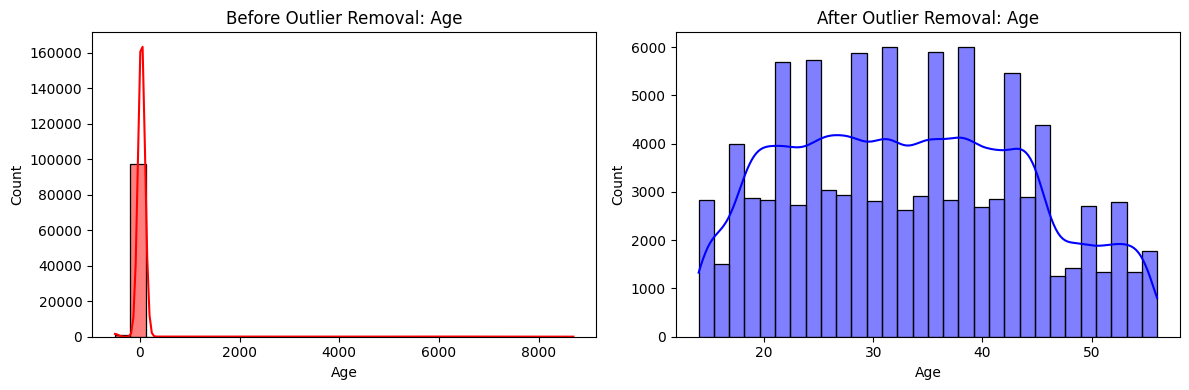

count      mean        std   min   25%   50%   75%   max
Age  100000.0  33.31118  10.764783  14.0  24.0  33.0  42.0  56.0

In [13]:
remove_outliers_data(df,'Age',0,60)
df[['Customer_ID','Age']].describe().T

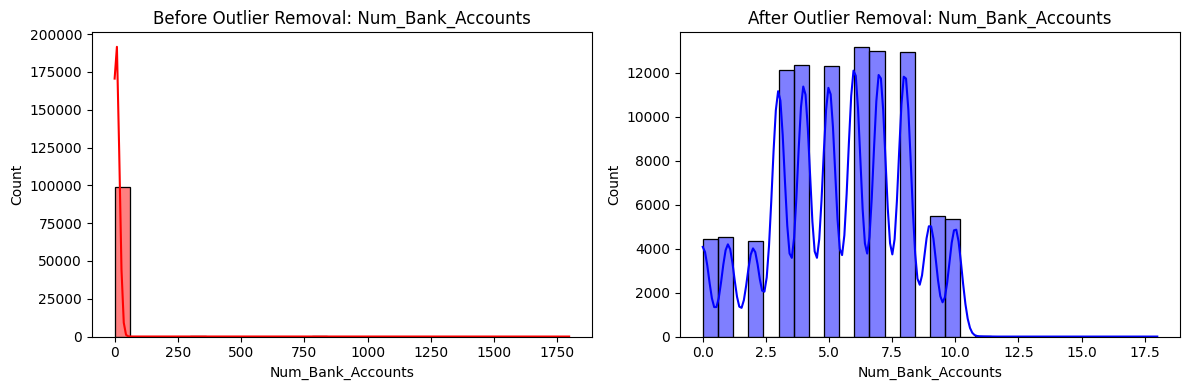

count     mean      std  min  25%  50%  75%   max
Num_Bank_Accounts  100000.0  5.36896  2.59358  0.0  3.0  5.0  7.0  18.0

In [14]:
remove_outliers_data(df,'Num_Bank_Accounts',0,20)
df[['Customer_ID','Num_Bank_Accounts']].describe().T

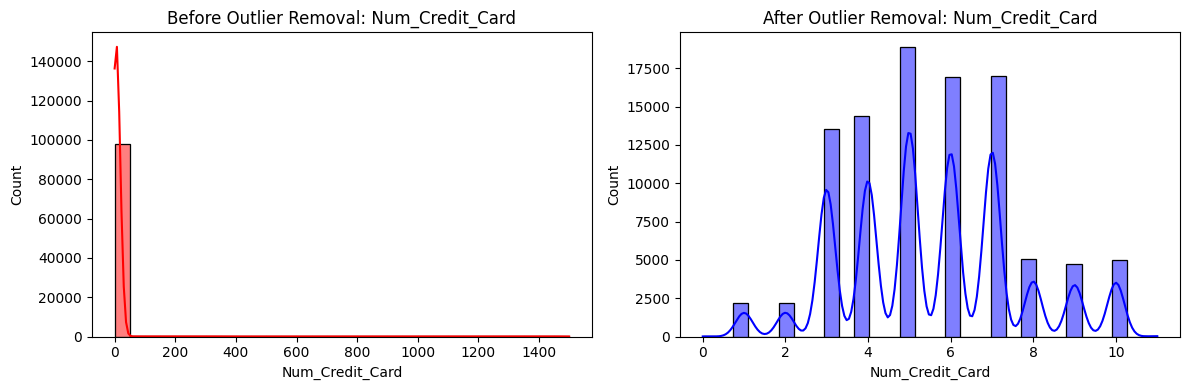

count     mean       std  min  25%  50%  75%   max
Num_Credit_Card  100000.0  5.53368  2.067126  0.0  4.0  5.0  7.0  11.0

In [15]:
remove_outliers_data(df,'Num_Credit_Card',0,13)
df[['Customer_ID','Num_Credit_Card']].describe().T

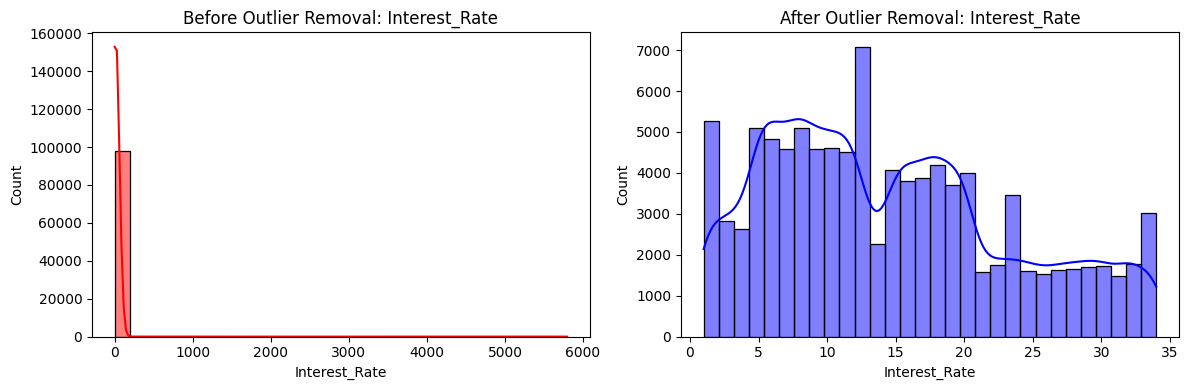

count      mean      std  min  25%   50%   75%   max
Interest_Rate  100000.0  14.53208  8.74133  1.0  7.0  13.0  20.0  34.0

In [16]:
remove_outliers_data(df,'Interest_Rate',0,50)
df[['Customer_ID','Interest_Rate']].describe().T

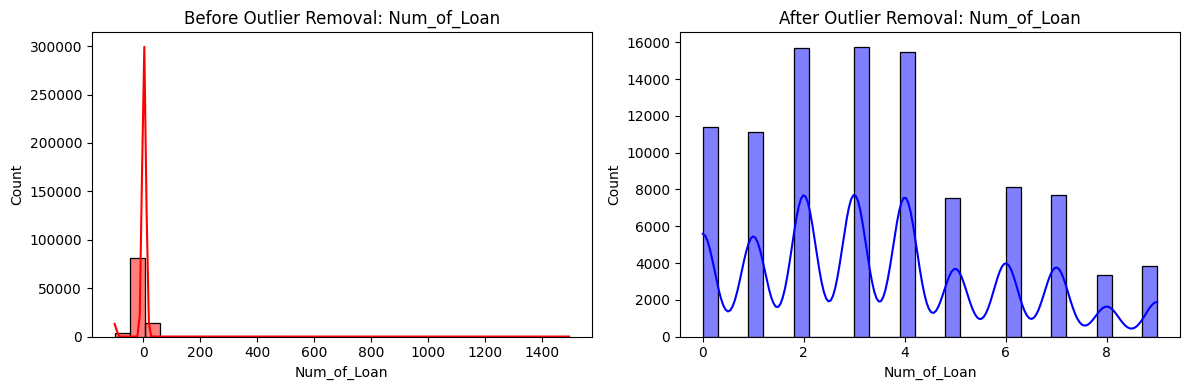

count     mean       std  min  25%  50%  75%  max
Num_of_Loan  100000.0  3.53288  2.446356  0.0  2.0  3.0  5.0  9.0

In [17]:
remove_outliers_data(df,'Num_of_Loan',0,15)
df[['Customer_ID','Num_of_Loan']].describe().T

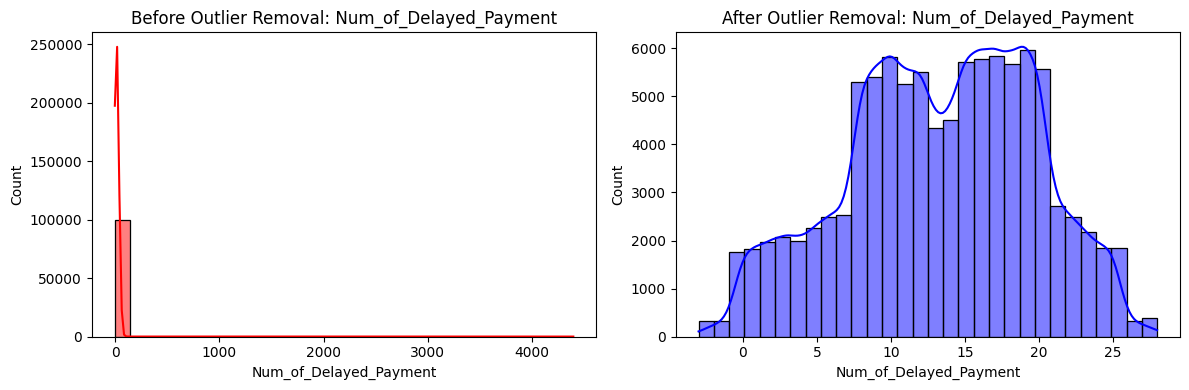

count      mean       std  min  25%   50%   75%  \
Num_of_Delayed_Payment  100000.0  13.30943  6.303448 -3.0  9.0  14.0  18.0   

                         max  
Num_of_Delayed_Payment  28.0

In [18]:
remove_outliers_data(df,'Num_of_Delayed_Payment',-3,30)
df[['Customer_ID','Num_of_Delayed_Payment']].describe().T

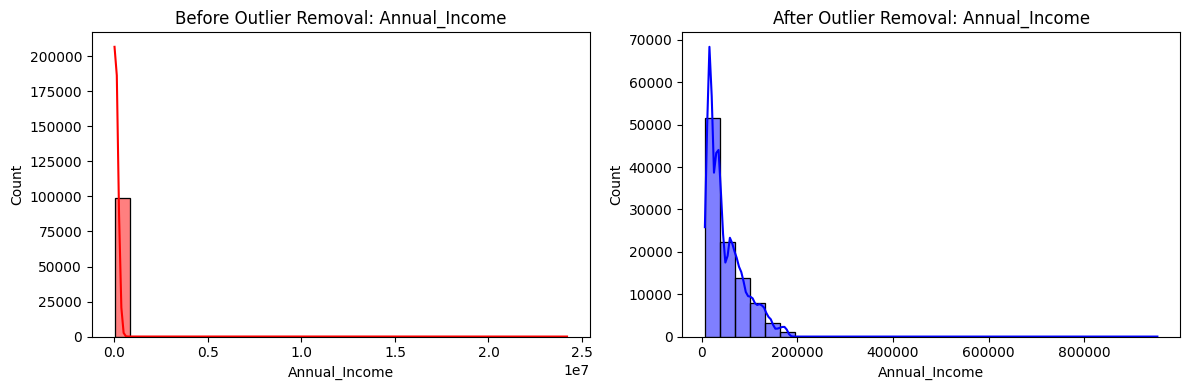

count          mean           std      min       25%  \
Annual_Income  100000.0  50703.518397  39818.323244  7005.93  19355.62   

                   50%       75%       max  
Annual_Income  37024.7  71703.22  952323.0

In [19]:
remove_outliers_data(df,'Annual_Income',0,1000000)
df[['Customer_ID','Annual_Income']].describe().T

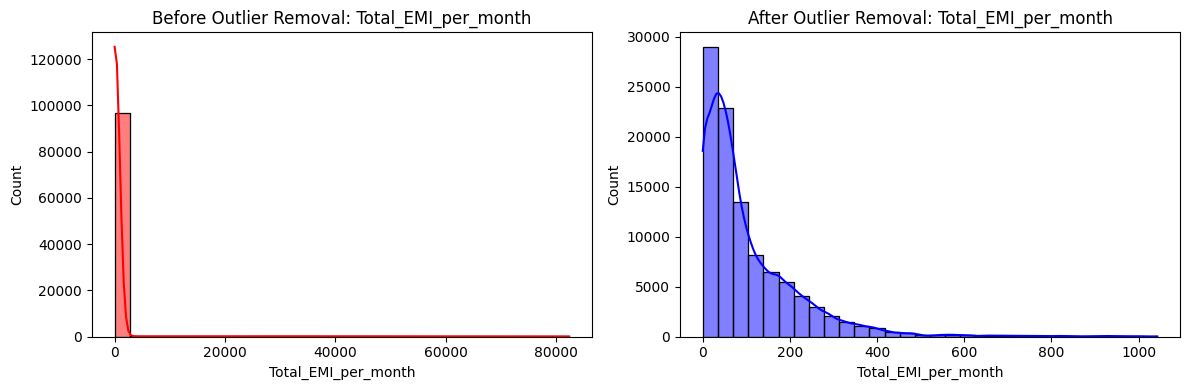

count      mean         std  min        25%       50%  \
Total_EMI_per_month  100000.0  104.1194  114.036726  0.0  29.105604  66.35346   

                            75%          max  
Total_EMI_per_month  145.953113  1042.674209

In [20]:
remove_outliers_data(df,'Total_EMI_per_month',0,1045)
df[['Customer_ID','Total_EMI_per_month']].describe().T

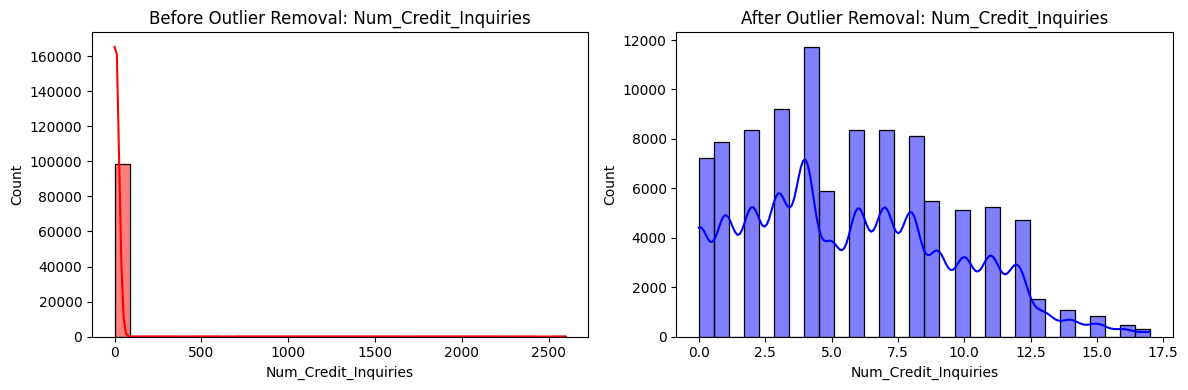

count     mean       std  min  25%  50%  75%   max
Num_Credit_Inquiries  100000.0  5.77928  3.862659  0.0  3.0  5.0  8.0  17.0

In [21]:
remove_outliers_data(df,'Num_Credit_Inquiries',0,20)
df[['Customer_ID','Num_Credit_Inquiries']].describe().T

In [22]:
# Handle outliers in skewed data is using the IQR (Interquartile Range) method + Capping.
# Capping
temp_df = df.copy()
def cap_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  print(f"{column} - Removing outliers outside the range: [{lower_bound:.2f}, {upper_bound:.2f}]")
  df[column] = np.where(df[column] > upper_bound,upper_bound,
    np.where(df[column] < lower_bound,lower_bound,
        df[column]))
  return df

In [23]:
def capp_outliers_data_visual(temp_df,df,column):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(temp_df[column], kde=True,ax=axes[0],bins=30, color='red')
    axes[0].set_title(f"Before Outlier Removal: {column}")
    sns.histplot(df[column],kde=True, ax=axes[1],bins=30, color='blue')
    axes[1].set_title(f"After Outlier Removal: {column}")
    plt.tight_layout()
    plt.show()
    return

Amount_invested_monthly - Removing outliers outside the range: [-137.52, 434.57]


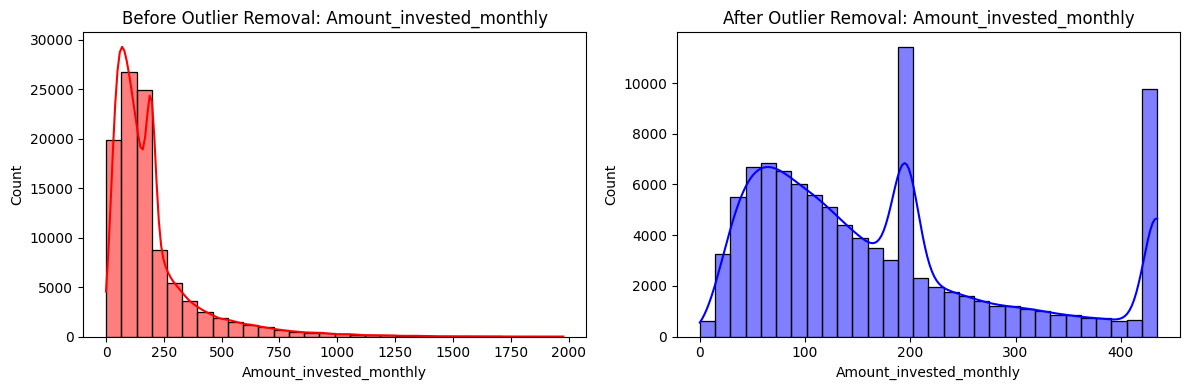

Monthly_Balance - Removing outliers outside the range: [-31.83, 767.37]


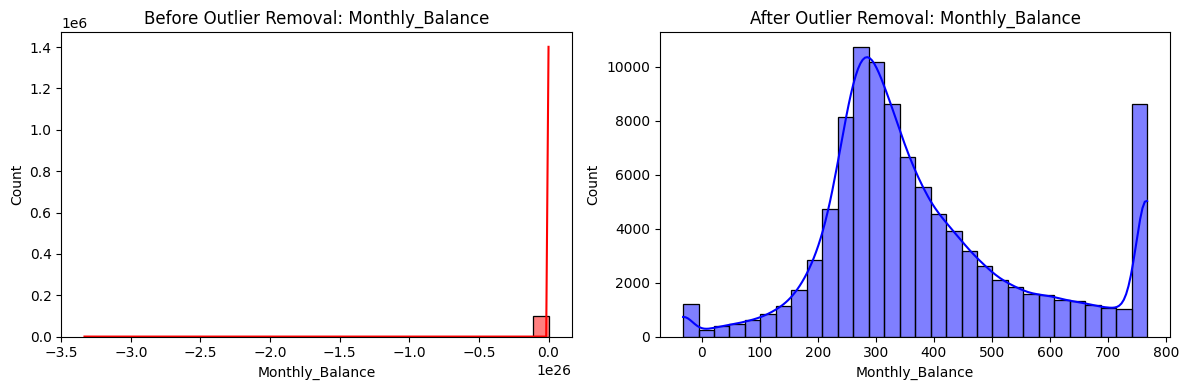

In [24]:
#Capping use
capp_colummn=['Amount_invested_monthly' , 'Monthly_Balance']
for col in capp_colummn:
    cap_outliers_iqr(df, col)
    capp_outliers_data_visual(temp_df,df,col)

In [ ]:
numerical_cols = ['Age','Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate',
    'Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt',
    'Credit_Utilization_Ratio','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance','Credit_History_Month_Age']

categorical_cols = ['Month','Occupation','Type_of_Loan',
    'Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Credit_Score']
target_col = ['Credit_Score']


In [ ]:
def plot_histograms(df, columns, rows=2, cols=3):

    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        if i < len(axes):
            sns.histplot(df[col], kde=True, ax=axes[i], bins=100)
            axes[i].set_title(col)
            axes[i].set_xlabel('')

    # Remove unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_histograms(df, numerical_cols, rows=5, cols=4)

In [25]:
# Drop Columns
df.drop(['ID','Customer_ID','Name','SSN','Credit_History_Age'], axis=1, inplace=True)

**Four columns drop and one columns change total month convart and handle missing vaules.**

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  float64
 6   Num_Credit_Card           100000 non-null  float64
 7   Interest_Rate             100000 non-null  float64
 8   Num_of_Loan               100000 non-null  float64
 9   Type_of_Loan              100000 non-null  object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      100000 non-null  float64
 13  Num_Credit_Inquiries      100000 non-null  float64

### **Exploratory Data Analysis (EDA)**

### **Distribution of Credit Scores**

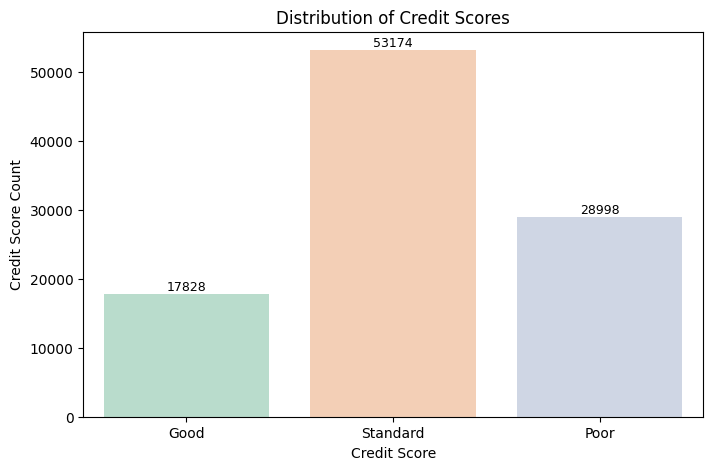

In [ ]:
# Distribution of Credit Scores
plt.figure(figsize=(8, 5))

ax = sns.countplot(x=df['Credit_Score'],palette='Pastel2')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Credit Score Count')
plt.show()

* The Visualization chart insight Distribution of cardit score total count of individuals in each category like a Good,Standard and Poor.

* Most highest count Standard credit score, if poor credit scores dominate the may represent a **high-risk-group**, useful for credit risk modeling or policy changes, and if good credit scores dominate very few user ,it may indicate an opportunity for **credit-building programs or better financial advisory services.**   

### **Occupation Distribution by Credit Score**

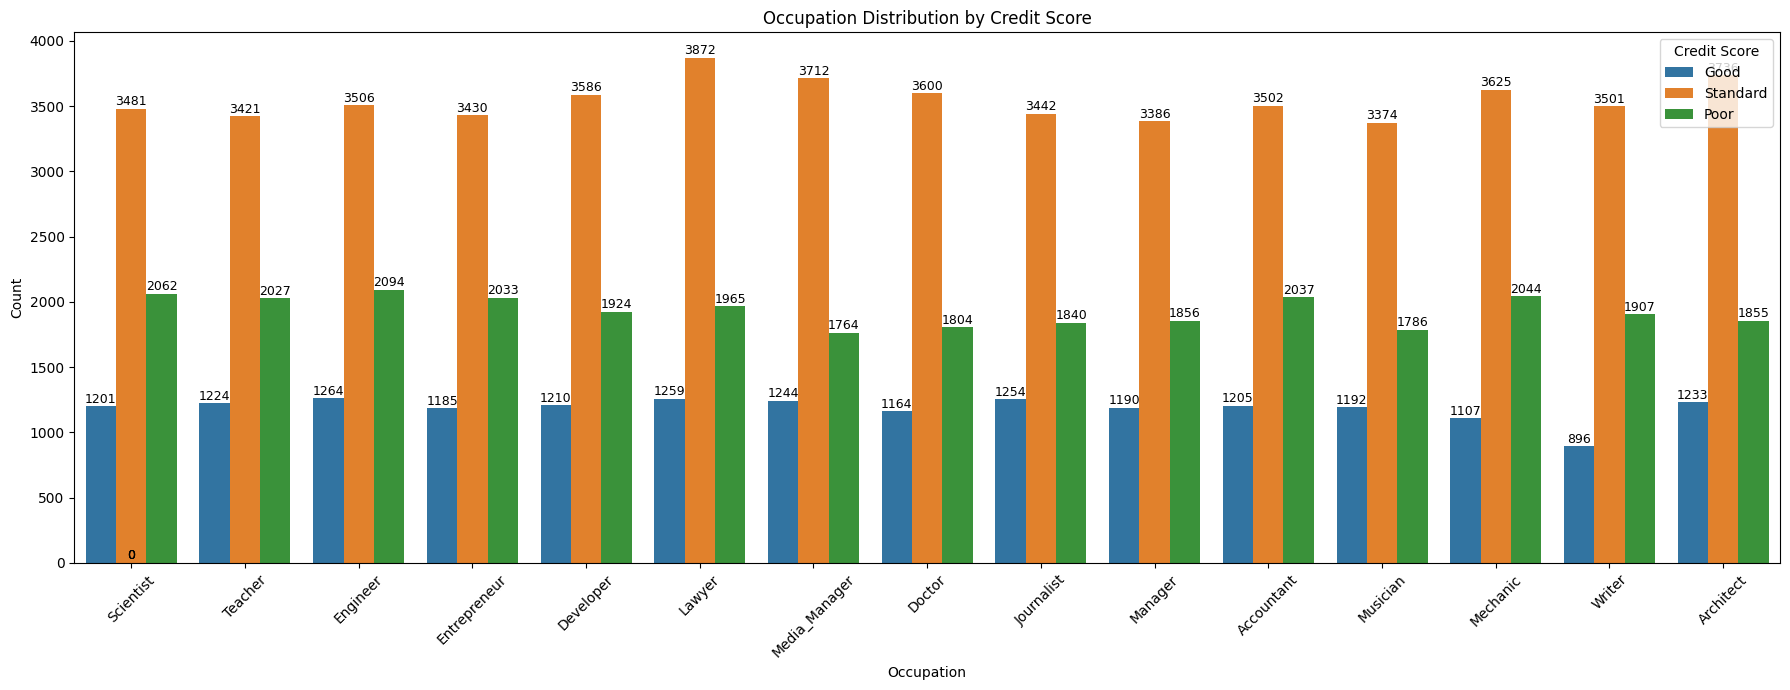

In [ ]:
# Occupation Distribution by Credit Score
plt.figure(figsize=(18, 7))
ax=sns.countplot(data=df, x='Occupation', hue='Credit_Score')
for p in ax.patches:
  ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('Occupation Distribution by Credit Score')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='Credit Score', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Insights from the Occupation Distribution by Credit Score Chart, total count of individuals in each occapation categroy by credit score.

* Occupations may have a higher proportion of "Standard" credit scores, suggesting better financial management or income stability.

* Occupations with a dominant count of "Poor" credit scores could indicate financial instability or irregular income patterns.

### **Payment Behaviour Distribution by Credit Score**

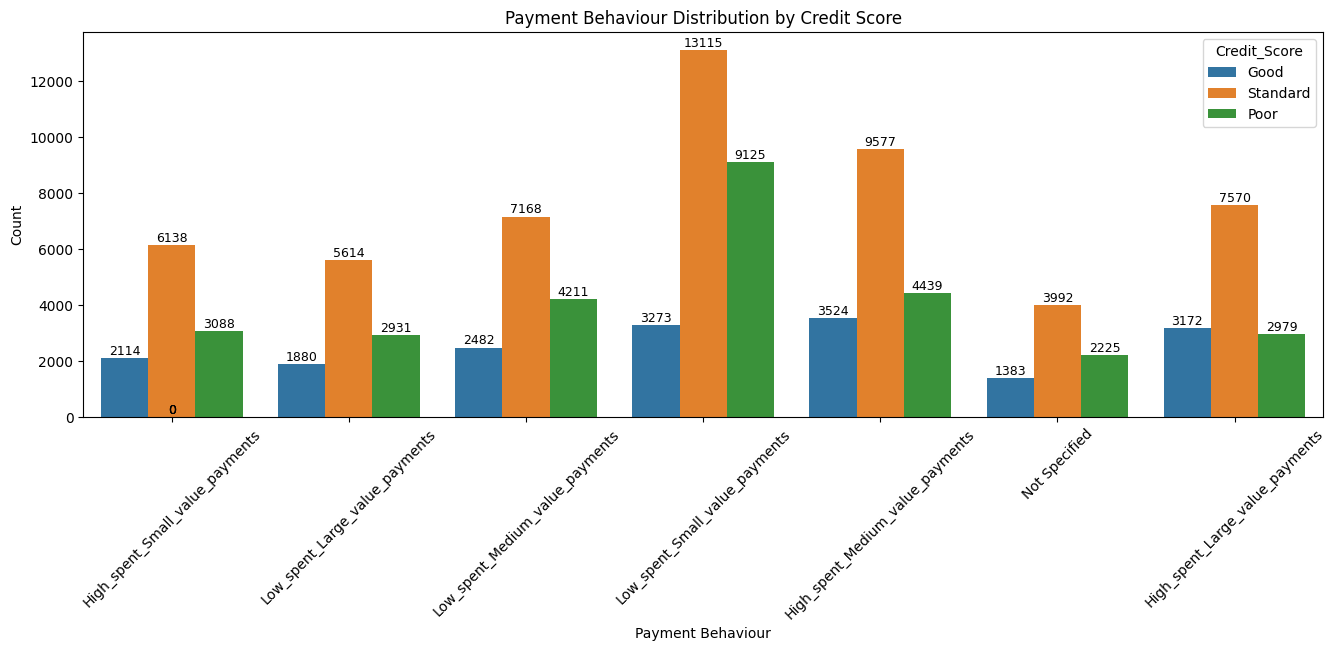

In [ ]:
# Payment Behaviour Distribution by Credit Score
plt.figure(figsize=(16, 5))
ax = sns.countplot(data=df, x='Payment_Behaviour', hue='Credit_Score')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('Payment Behaviour Distribution by Credit Score')
plt.xlabel('Payment Behaviour')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

* Insights from Payment Behaviour Distribution by Credit Score. The total count of individuals in each payment behaviour categroy by credit score.

* Payment behaviors like “Low_spent_Small_value_payments” may show higher counts of “Standard” credit scores, suggesting these individuals manage credit well.

### **Numarical feature by Credit Scores**

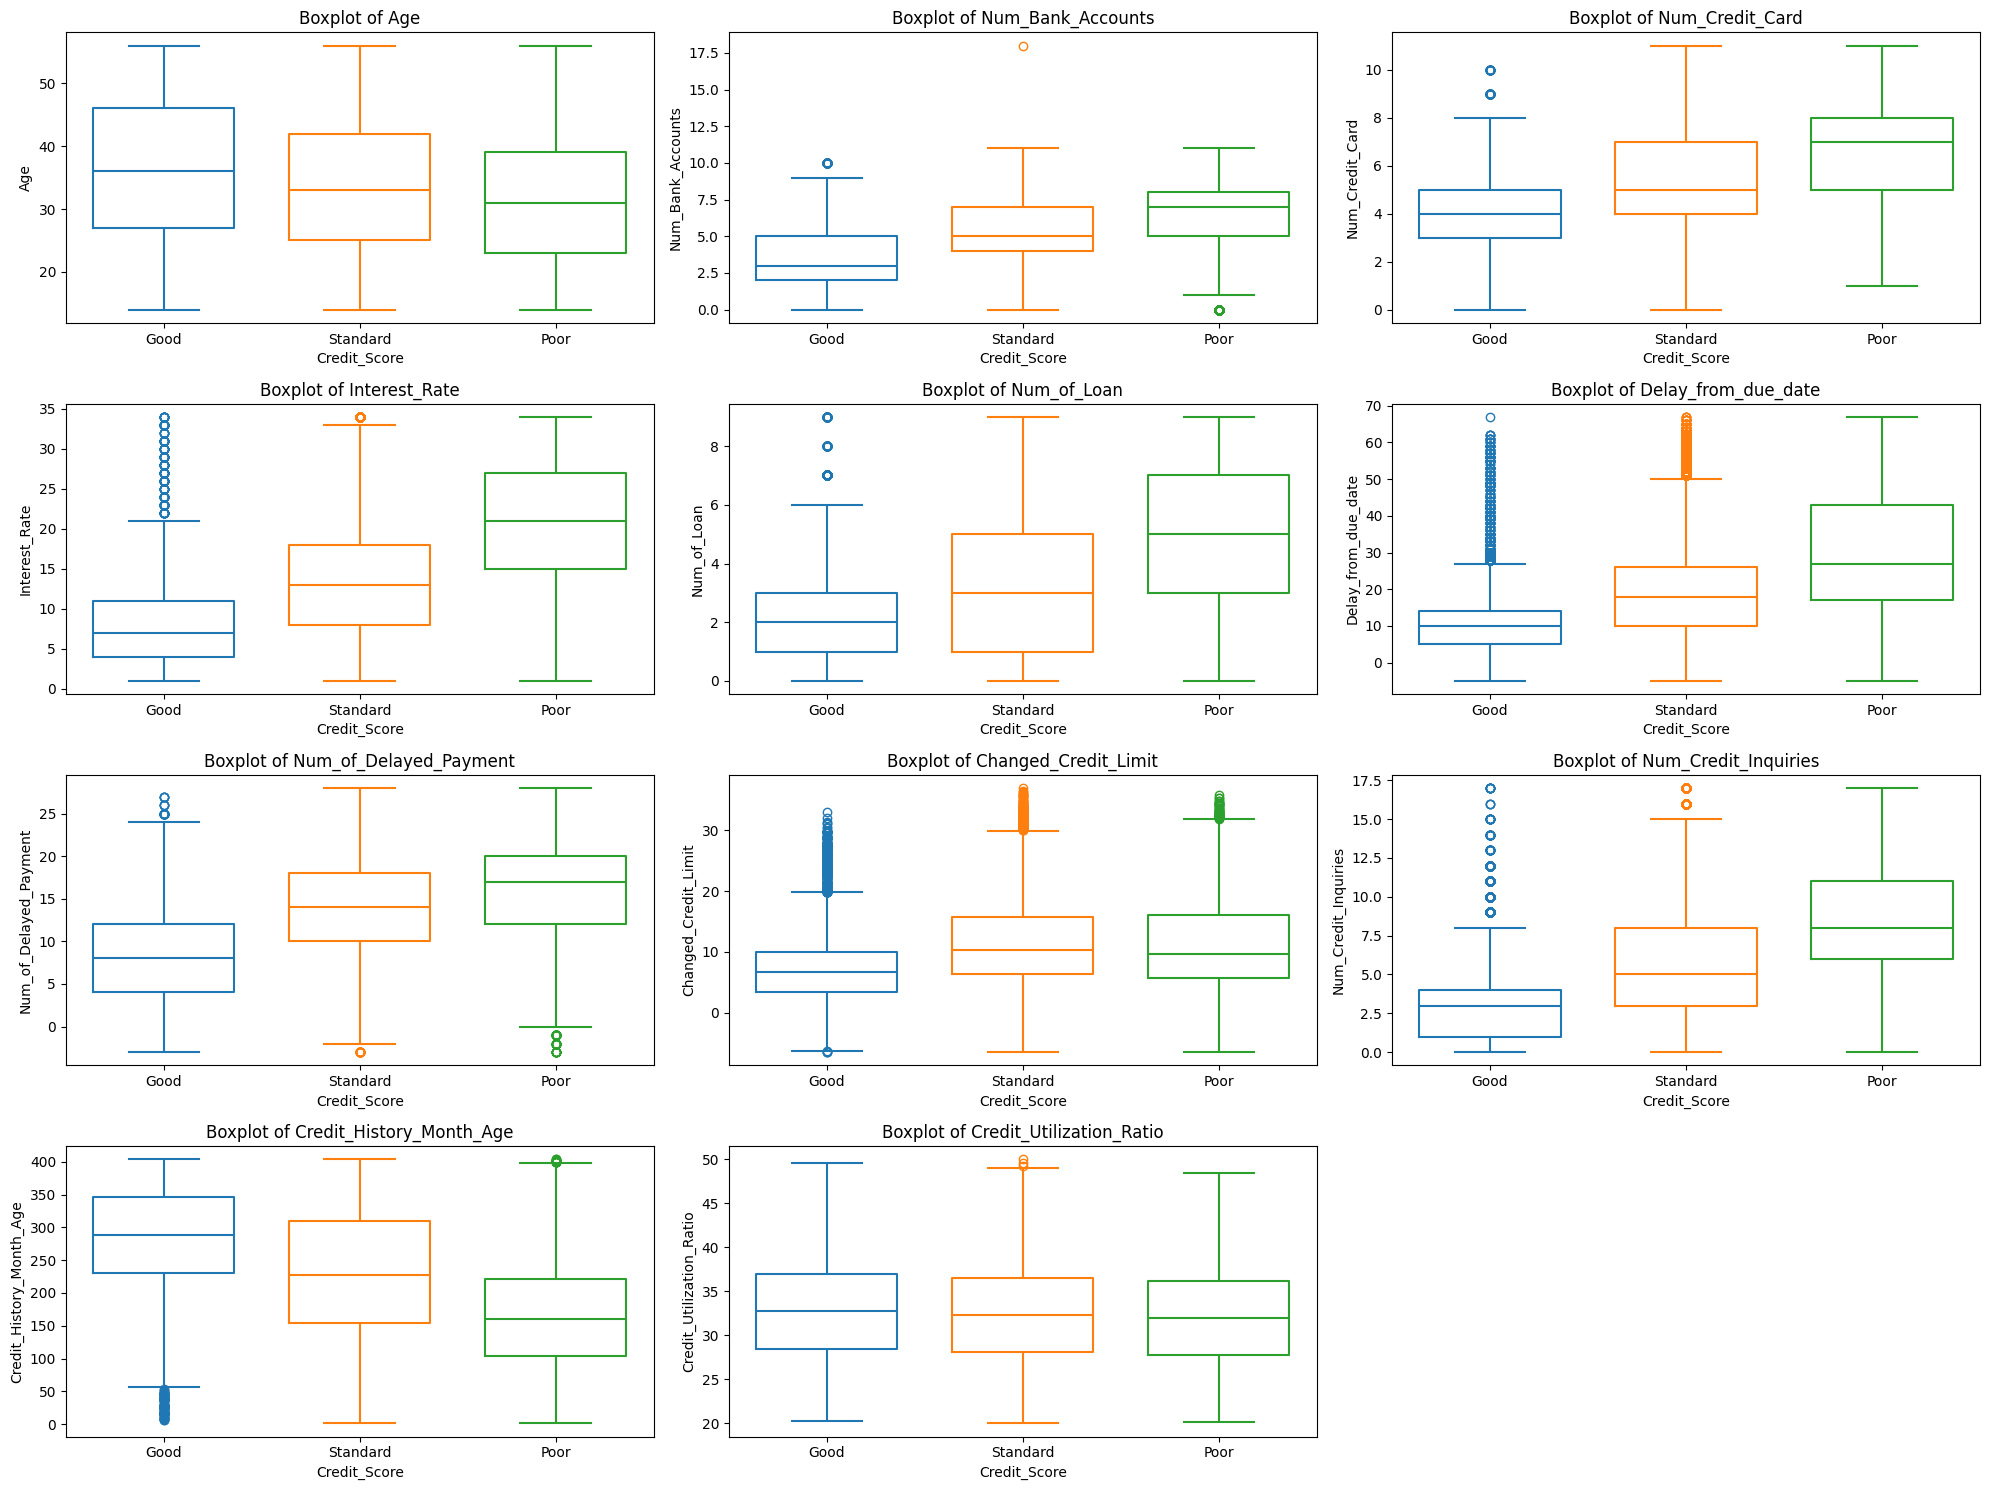

In [ ]:
# Numarical feature by Credit Scores
num_box_column=['Age','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate',
    'Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Credit_History_Month_Age','Credit_Utilization_Ratio']
# Define your custom palette
custom_palette = ['#3174a1', '#e1812b', '#3a923b']

plt.figure(figsize=(20, 15))
for i, col in enumerate(num_box_column):
    plt.subplot(4, 3, i+1)
    sns.boxplot(data=df, x="Credit_Score", y=df[col], hue="Credit_Score", fill=False, gap=.1)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
fig_prestamo1 = px.violin(df,x='Credit_Score',y='Outstanding_Debt',color='Credit_Score',box=True,
                          color_discrete_sequence=px.colors.qualitative.Vivid,width=900, height=500,title='Outstanding_Debt vs Credit_Score')
fig_prestamo1.update_layout(showlegend=False)
fig_prestamo1.show()

### **Monthly Inhand Salary vs Total EMI Per Month, by Credit Score**

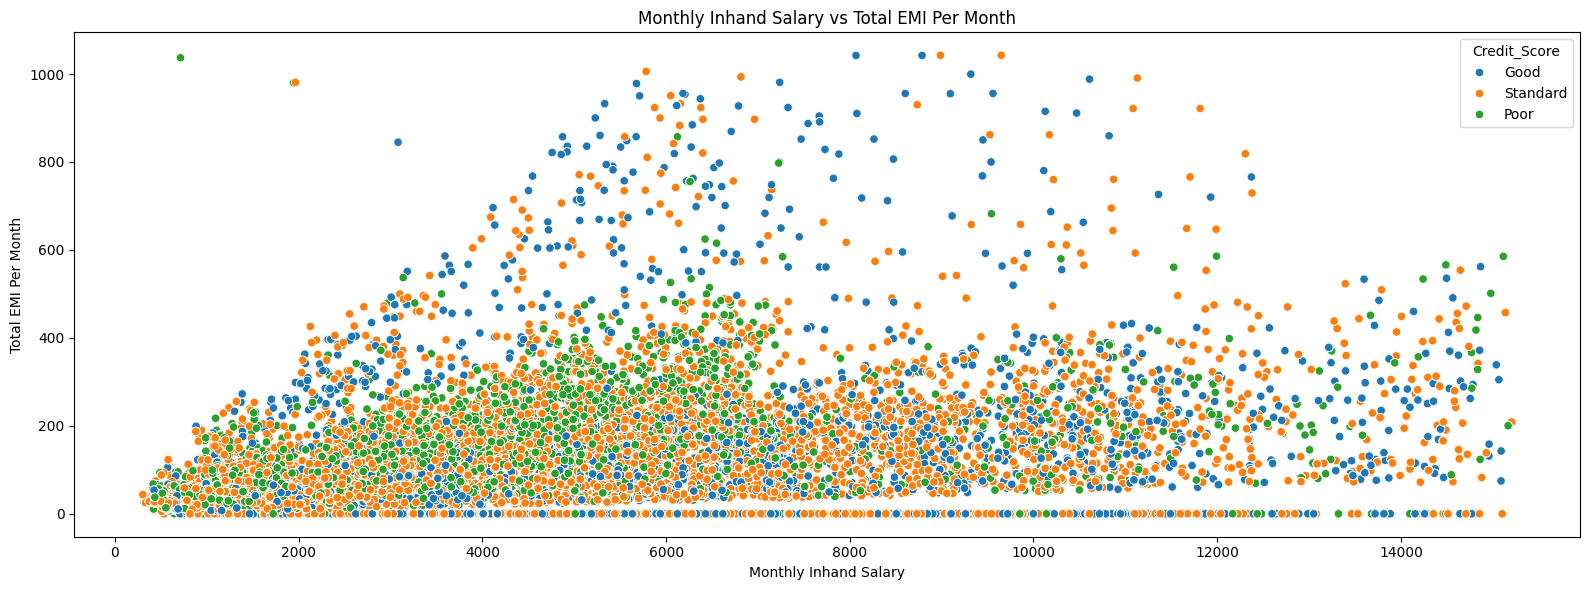

In [ ]:
# Monthly Inhand Salary vs Total EMI Per Month,by Credit Score
plt.figure(figsize=(16, 6))
sns.scatterplot(x='Monthly_Inhand_Salary', y='Total_EMI_per_month',data=df, hue='Credit_Score')
plt.title('Monthly Inhand Salary vs Total EMI Per Month')
plt.xlabel('Monthly Inhand Salary')
plt.ylabel('Total EMI Per Month')
plt.tight_layout()
plt.show()

* Insights from the scatter plot of Monthly Inhand Salary vs Total EMI Per Month by Credit scores.

* High monthly salaries have Low EMI per month, Poor or Standard credit scores, suggesting poor financial management or high liabilities.

* Low or Moderate salaries have high EMI per month.

### **Average Monthly Balance by Occupation and Credit Score**

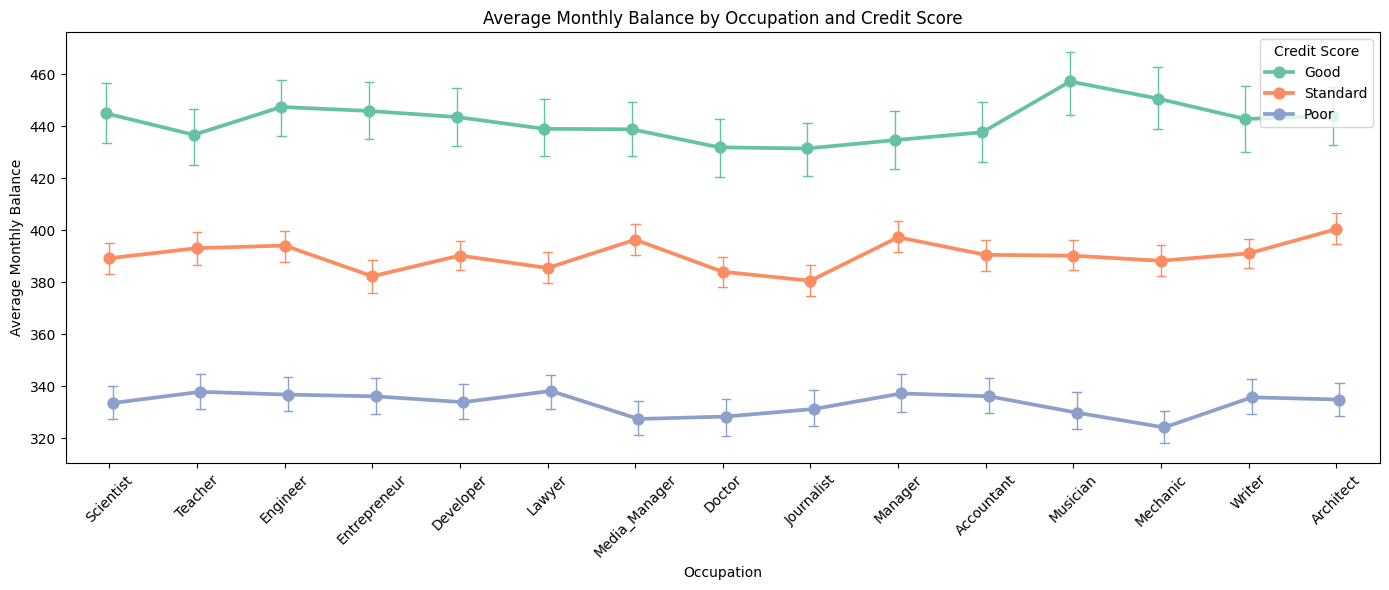

In [ ]:
plt.figure(figsize=(14, 6))
sns.pointplot(data=df,x='Occupation',y='Monthly_Balance',hue='Credit_Score',
    dodge=True,capsize=0.1,errwidth=1,palette='Set2')
plt.title('Average Monthly Balance by Occupation and Credit Score')
plt.xlabel('Occupation')
plt.ylabel('Average Monthly Balance')
plt.xticks(rotation=45)
plt.legend(title='Credit Score', loc='upper right')
plt.tight_layout()
plt.show()


### **Pairwise Relationships between Multiple numerical variables**

<Figure size 1400x600 with 0 Axes>

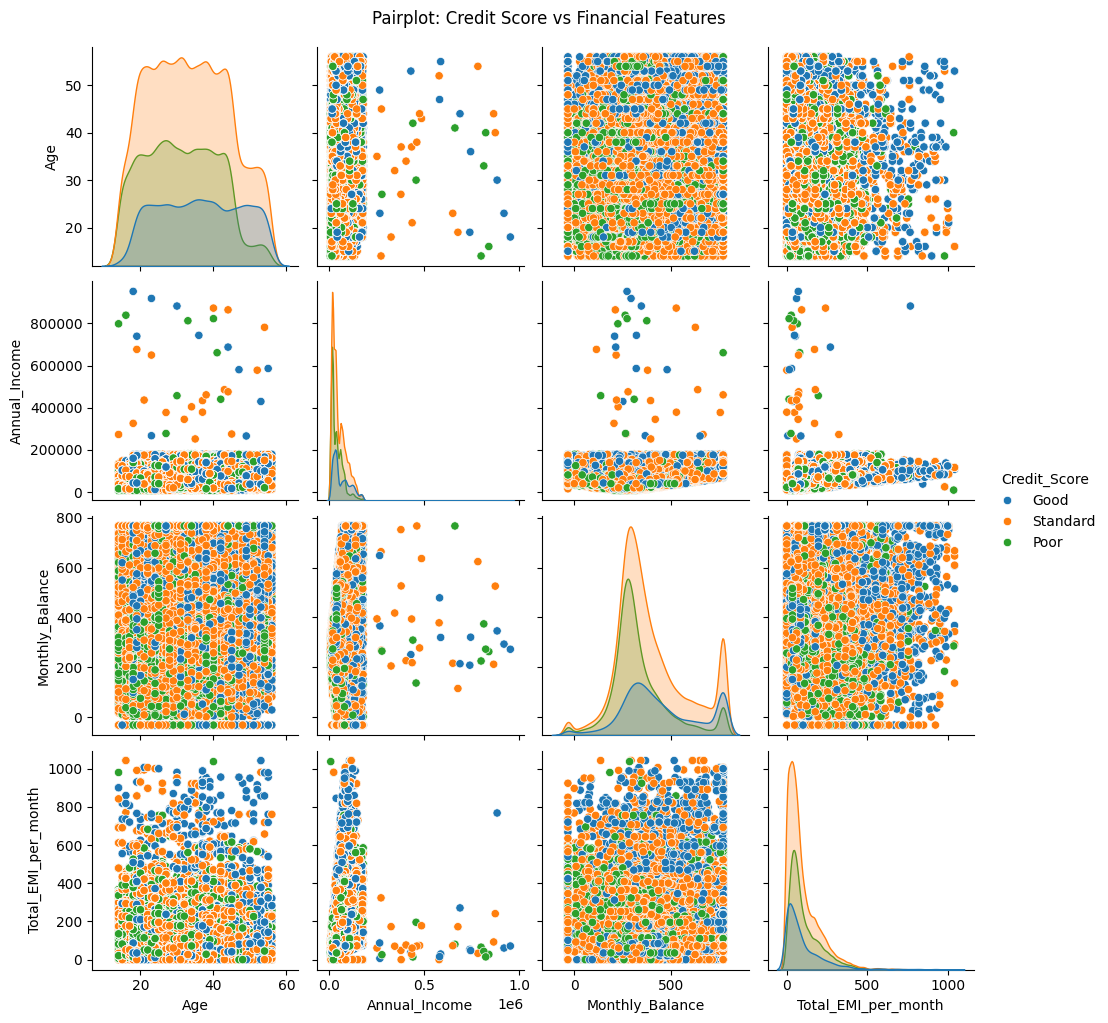

In [ ]:
#pairwise relationships between multiple numerical variables
plt.figure(figsize=(14, 6))
sns.pairplot(df[['Age','Annual_Income', 'Monthly_Balance', 'Total_EMI_per_month','Credit_Score']], hue='Credit_Score')
plt.suptitle('Pairplot: Credit Score vs Financial Features', y=1.02)
plt.show()

* Standard credit scores tend to cluster around higher monthly balances.

* There's a negative correlation between Monthly Balance and EMI — higher EMIs reduce monthly balance.

* Good credit score holders generally maintain low or moderate EMI levels.

### **Relationships between numerical variables**

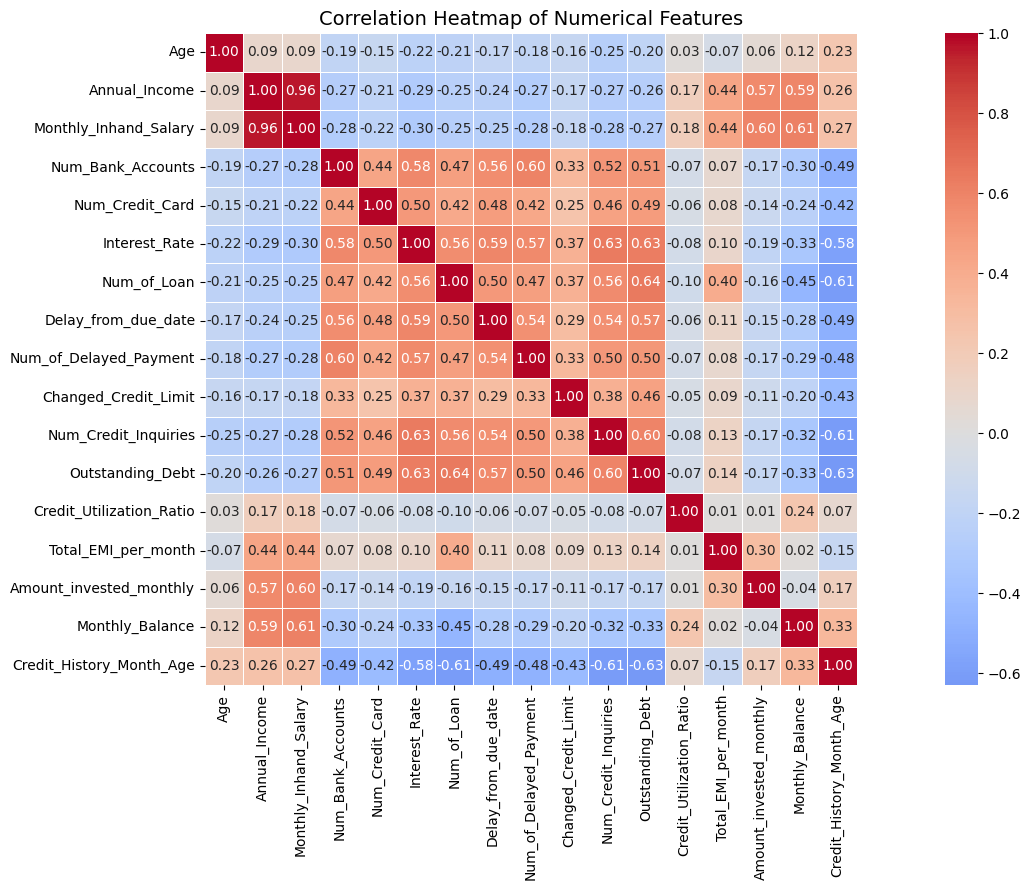

In [ ]:
# Select only numerical features
num_cols = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts','Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
    'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries','Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
    'Amount_invested_monthly', 'Monthly_Balance', 'Credit_History_Month_Age']

# Compute the correlation matrix
corr_matrix = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(18, 9))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

* Annual_Income ↔ Monthly_Inhand_Salary: A high positive correlation is expected, as monthly salary is derived from annual income.

* Amount_invested_monthly ↔ Monthly_Balance: These are likely positively correlated; people with higher monthly balance tend to invest more.

* Outstanding_Debt ↔ Total_EMI_per_month: Indicates that users with more outstanding debt also have higher EMI commitments.

* Num_Credit_Card ↔ Num_Credit_Inquiries – Users with more cards may apply more often.

* Changed_Credit_Limit ↔ Num_Credit_Inquiries Moderate Correlations When credit limits change, it may trigger more inquiries or be the result of them.

* Delay_from_due_date ↔ Annual_Income May have weak correlation, indicating that delays are not directly tied to income/debt levels.

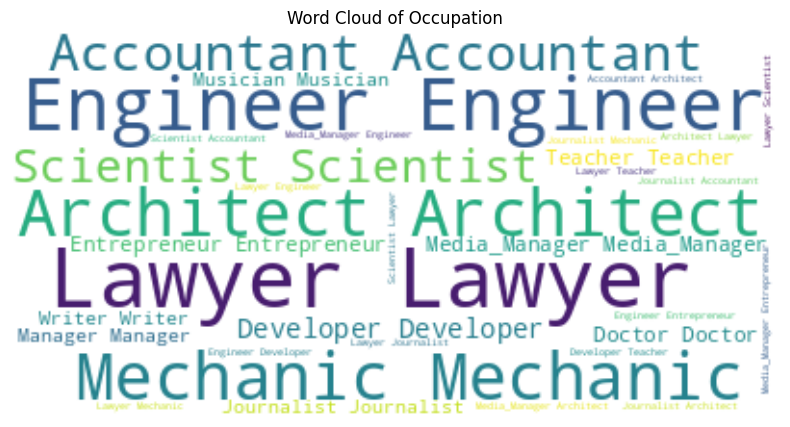

In [ ]:
from wordcloud import WordCloud
# Join all text data in 'Payment_Behaviour'
text = " ".join(df['Occupation'].dropna().tolist())

# Generate word cloud
wordcloud = WordCloud(background_color='white', max_words=100).generate(text)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Occupation")
plt.show()

In [28]:
train_clean = df.to_csv('train_clean.csv', index=False)

### **Pre-processing** - LabelEncoder

In [ ]:
categorical_columns=list(set(df.columns.to_list()).difference(set(df.describe().columns.to_list())))
print("Categorical Columns are :-", categorical_columns)

Categorical Columns are :- ['Occupation', 'Payment_Behaviour', 'Credit_Mix', 'Month', 'Credit_Score', 'Type_of_Loan', 'Payment_of_Min_Amount']


In [26]:
df_label= df.copy()

In [27]:
from sklearn.preprocessing import LabelEncoder
# Useful for features where the values may have an implied order
label_enc = LabelEncoder()
df_label['Credit_Score'] = label_enc.fit_transform(df_label['Credit_Score'])# Credit Score: Good:0 > poor:1 > Standard:2
df_label['Credit_Mix'] = label_enc.fit_transform(df_label['Credit_Mix'])
df_label['Payment_of_Min_Amount'] = label_enc.fit_transform(df_label['Payment_of_Min_Amount'])# Yes:2,No:1,NM:0
df_label['Type_of_Loan'] = label_enc.fit_transform(df_label['Type_of_Loan'])

#Payment_Behaviour
payment_label_dict={'Low_spent_Small_value_payments':0,'High_spent_Medium_value_payments':1,
                    'Low_spent_Medium_value_payments':2,'High_spent_Large_value_payments':3,
                    'High_spent_Small_value_payments':4,'Low_spent_Large_value_payments':5,'Not Specified':6}
df_label['Payment_Behaviour']=df_label['Payment_Behaviour'].map(payment_label_dict)

# Occupation data
occupation_mapping_dict = {'Lawyer':0,'Engineer':1,'Architect':2,'Mechanic':3,'Accountant':4,'Scientist':5,'Media_Manager':6,
                      'Developer':7,'Teacher':8,'Entrepreneur':9,'Doctor':10,'Journalist':11,'Manager':12,'Musician':13,'Writer':14}#
df_label['Occupation']=df_label['Occupation'].map(occupation_mapping_dict)

#Month
month_label_dict = {"January" : 0,"February" : 1,"March" : 2,"April" : 3,"May" : 4,"June" : 5,"July" : 6,"August" : 7}
df_label["Month"] = df_label["Month"].map(month_label_dict)

In [ ]:
df_label

### **Model Selection, Training & Evaluation**

In [43]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split #
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier # Make sure to import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay,roc_auc_score,roc_curve, auc
#Handle Imbalance Data
from imblearn.over_sampling import SMOTE

In [30]:
# Split data into training and test sets
X = df_label.drop('Credit_Score',axis=1) # features (Independent variables)
y = df_label['Credit_Score'] # Target (Dependent variable)

# Check the shape of X and y to confirm the split
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

# standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Shape of X: (100000, 23)
Shape of y: (100000,)


In [31]:
# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

In [32]:
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(f"Shape of X_trian = {X_train.shape}\n Shape of y_trian = {y_train.shape}\n Shape of X_test = {X_test.shape}\n Shape of y_test = {y_test.shape}")

Shape of X_trian = (80000, 23)
 Shape of y_trian = (80000,)
 Shape of X_test = (20000, 23)
 Shape of y_test = (20000,)


**Logistic Regression :**

* Is great for binary classification problems (e.g., predicting whether a customer will have a good or poor credit score).

* It's easy to understand and interpret, especially when you need to explain the effect of each feature on the outcome.

* It's a linear model, so it's best for datasets where the relationship between features and target is linear.

In [33]:
#LogisticRegression
logistic_model = LogisticRegression() # Initialize the Logistic Regression model
logistic_model.fit(X_train, y_train)# Train the model
y_pred_logr = logistic_model.predict(X_test)# Make predictions
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred_logr)
print(f"Accuracy {logistic_model}: {accuracy}")
print(classification_report(y_test, y_pred_logr))

Accuracy LogisticRegression(): 0.64905
              precision    recall  f1-score   support

           0       0.56      0.54      0.55      3566
           1       0.67      0.52      0.59      5799
           2       0.67      0.75      0.71     10635

    accuracy                           0.65     20000
   macro avg       0.63      0.61      0.62     20000
weighted avg       0.65      0.65      0.64     20000



In [131]:
print(confusion_matrix(y_test, y_pred_logr))# Confusion Matrix

[[1930   49 1587]
 [ 326 3043 2430]
 [1168 1459 8008]]


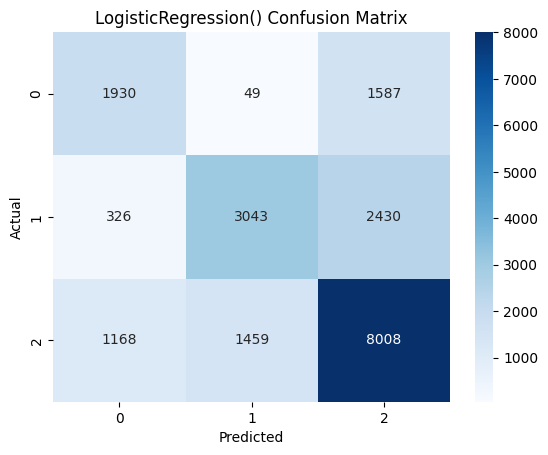

In [34]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_logr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"{logistic_model} Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**XGBoost(Extreme Gradient Boosting):**
* XGBoost is one of the best-performing models for classification problems, especially with imbalanced data.

* It works well when you have complex, non-linear relationships in your data and need to handle overfitting through regularization.

* XGBoost is faster and often outperforms other models on structured/tabular data due to its boosting algorithm.

In [45]:
# XBGClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss') # Replace xgb.XGBClassifier with XGBClassifier
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test) # Replace xgb.predict with xgb_model.predict

# Evaluate the model
print("XGBoost Model Evaluation:")
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy : {accuracy}")
print(classification_report(y_test, y_pred_xgb))  # Precision, Recall, F1-Score

XGBoost Model Evaluation:
Accuracy : 0.7811
              precision    recall  f1-score   support

           0       0.71      0.76      0.73      3566
           1       0.77      0.76      0.77      5799
           2       0.81      0.80      0.80     10635

    accuracy                           0.78     20000
   macro avg       0.77      0.77      0.77     20000
weighted avg       0.78      0.78      0.78     20000



In [132]:
print(confusion_matrix(y_test, y_pred_xgb))       # Confusion Matrix

[[2693   46  827]
 [ 209 4427 1163]
 [ 884 1249 8502]]


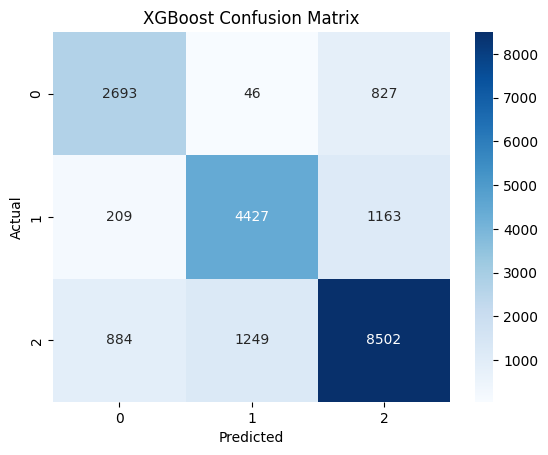

In [46]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Random Forest Classifier**

* Random Forest is a non-linear, ensemble model based on decision trees. It’s great for handling both classification and regression tasks.

* It works well even with complex relationships and handles missing values and outliers well.

* It's robust against overfitting (especially when compared to single decision trees).

In [57]:
# RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
# Calculate Model Accuracy
print(f"Accuracy:{rfc}", accuracy_score(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_rfc))

Accuracy:RandomForestClassifier() 0.8303
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      3566
           1       0.81      0.85      0.83      5799
           2       0.85      0.83      0.84     10635

    accuracy                           0.83     20000
   macro avg       0.82      0.83      0.82     20000
weighted avg       0.83      0.83      0.83     20000



In [133]:
print(confusion_matrix(y_test, y_pred_rfc))       # Confusion Matrix

[[2854   16  696]
 [  54 4941  804]
 [ 671 1153 8811]]


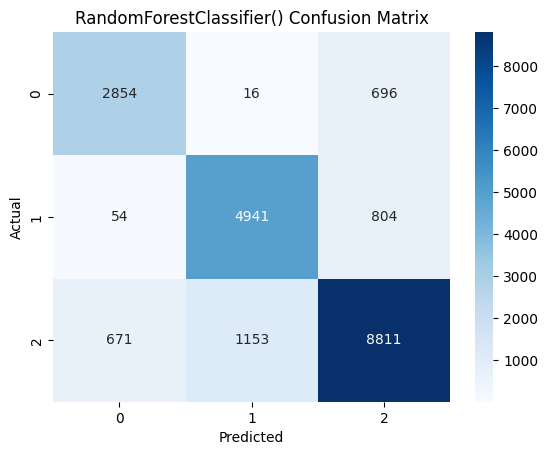

In [128]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"{rfc} Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**GradientBoostingClassifier**

In [82]:
#GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=42)
gbc.fit(X_train,y_train)
y_pred_gbc=gbc.predict(X_test)
print(f"Accuracy:GradientBoostingClassifier",accuracy_score(y_test,y_pred_gbc))
print(classification_report(y_test,y_pred_gbc))

Accuracy:GradientBoostingClassifier 0.7152
              precision    recall  f1-score   support

           0       0.58      0.71      0.64      3566
           1       0.75      0.64      0.69      5799
           2       0.75      0.76      0.76     10635

    accuracy                           0.72     20000
   macro avg       0.70      0.70      0.70     20000
weighted avg       0.72      0.72      0.72     20000



In [134]:
print(confusion_matrix(y_test, y_pred_gbc))       # Confusion Matrix

[[2523   42 1001]
 [ 439 3705 1655]
 [1356 1203 8076]]


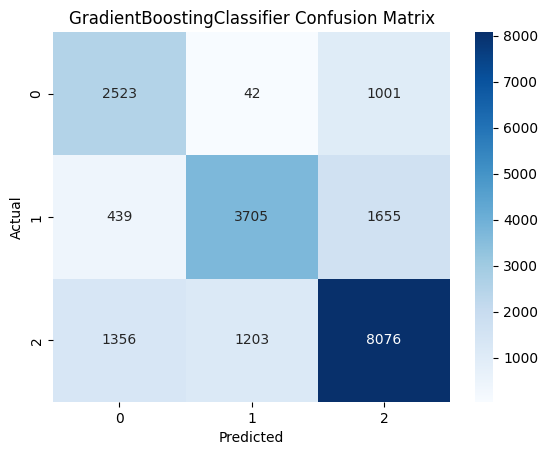

In [83]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gbc)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"GradientBoostingClassifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Hyperparameter Tuning with GridSearchCV**

In [ ]:
n_estimators = [20,60,100,120]# Number of trees in random forest
max_features = [0.2,0.6,1.0]# Number of features to consider at every split
max_depth = [2,8,None]# Maximum number of levels in tree
max_samples = [0.5,0.75,1.0]# Number of samples
param_grid = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,'max_samples':max_samples}

rf = RandomForestClassifier()
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, cv = 3, verbose=2,n_jobs = -1)
rf_grid.fit(X_train,y_train)
rf_grid.best_params_


In [63]:
print("Best params:", rf_grid.best_params_)
print("Best score:", rf_grid.best_score_)

Best params: {'max_depth': None, 'max_features': 0.2, 'max_samples': 1.0, 'n_estimators': 120}
Best score: 0.8084874863462317


In [64]:
scores = cross_val_score(rf_grid.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validated accuracy scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validated accuracy scores: [0.818     0.81925   0.8196875 0.8145    0.8156875]
Mean accuracy: 0.8174250000000001


Best Model RandomForestClassifier Accuracy: 0.8289
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      3566
           1       0.81      0.85      0.83      5799
           2       0.85      0.83      0.84     10635

    accuracy                           0.83     20000
   macro avg       0.82      0.83      0.82     20000
weighted avg       0.83      0.83      0.83     20000

[[2523   42 1001]
 [ 439 3705 1655]
 [1356 1203 8076]]


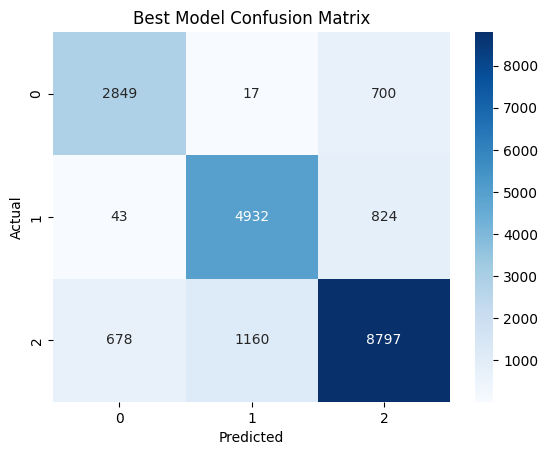

In [138]:
best_model_grid = rf_grid.best_estimator_

y_pred_model = rf_grid.predict(X_test)
print("Best Model RandomForestClassifier Accuracy:", accuracy_score(y_test, y_pred_model))

print(classification_report(y_test, y_pred_model))
print(confusion_matrix(y_test, y_pred_gbc))       # Confusion Matrix
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_model)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Best Model Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**AUC-ROC Curve**

**ROC Curve (Receiver Operating Characteristic):**

* The ROC curve is a graphical representation of a classifier's performance across all possible classification thresholds.

* X-axis: False Positive Rate (FPR)
FPR = FP / (FP + TN)

* Y-axis: True Positive Rate (TPR) or Recall
TPR = TP / (TP + FN)

Curve behavior:
* The curve shows how the TPR increases with the FPR as the classification threshold changes.

* As the threshold decreases, more samples are classified as positive, so both TPR and FPR may increase.

* The better the model, the more it will separate the positive and negative classes (the curve will bend toward the top-left corner).

**AUC (Area Under the Curve):**

* AUC is the area under the ROC curve. It’s a single value that represents the overall performance of the model.

Range:

* 1.0: Perfect classifier (all positives are ranked higher than all negatives).

* 0.5: Random guessing (model is unable to distinguish between classes).

* < 0.5: Worse than random guessing (model is incorrectly ranking classes).

Interpretation:-
AUC is a scalar value that summarizes the ROC curve. The higher the AUC, the better the model is at distinguishing between the two classes.

We call the predict_proba() function to generate the probability of a positive class. We use the predict() method to compute evaluation metrics such as accuracy, precision, recall, and F1-score.

Random Forest AUC - ROC Score (ovr): 0.94


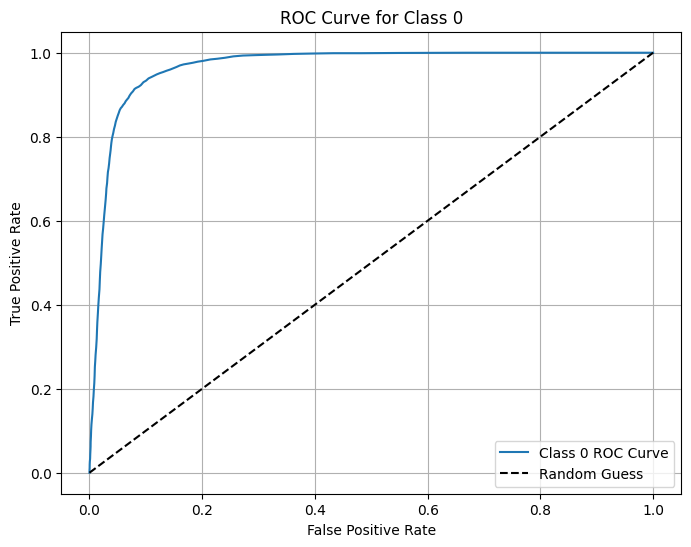

In [103]:
# Overall AUC-ROC Score for Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_grid.predict_proba(X_test), multi_class='ovr')
print(f"Random Forest AUC - ROC Score (ovr): {rf_roc_auc:.2f}")

# Select a specific class (e.g., class 0)
class_index = 0  # Change this index to plot a different class
class_label = rf_grid.classes_[class_index]

# Compute FPR and TPR for that class
rf_fpr, rf_tpr, _ = roc_curve(y_test == class_label, rf_grid.predict_proba(X_test)[:, class_index])

# Plot
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Class {class_label} ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for Class {class_label}')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [107]:
import joblib
# Save the best RandomForest model
joblib.dump(best_model_grid, 'random_forest_credit_score_model.pkl')

['random_forest_credit_score_model.pkl']

In [112]:
import pickle
# Save the best RandomForest model
with open('random_forest_credit_score_model_pickle.pkl', 'wb') as file:
    pickle.dump(best_model_grid, file)

**Hyperparameter Tuning with HalvingGridSearchCV**

In [51]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
param_grid = {
    'n_estimators': [100, 150, 200],         # Number of trees
    'max_depth': [10, 20, None],             # Depth of each tree
    'min_samples_split': [2, 5, 10],         # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],           # Minimum samples in a leaf node
    'max_features': ['sqrt', 'log2'],        # Number of features to consider when looking for the best split
}

halving_search = HalvingGridSearchCV(estimator=RandomForestClassifier(),
    param_grid=param_grid,cv=5,factor=4,scoring='accuracy',n_jobs=-1,verbose=1)
halving_search.fit(X_train, y_train)
print("Best parameters found:", halving_search.best_params_)
print("Best accuracy score:", halving_search.best_score_)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 1250
max_resources_: 80000
aggressive_elimination: False
factor: 4
----------
iter: 0
n_candidates: 162
n_resources: 1250
Fitting 5 folds for each of 162 candidates, totalling 810 fits
----------
iter: 1
n_candidates: 41
n_resources: 5000
Fitting 5 folds for each of 41 candidates, totalling 205 fits
----------
iter: 2
n_candidates: 11
n_resources: 20000
Fitting 5 folds for each of 11 candidates, totalling 55 fits
----------
iter: 3
n_candidates: 3
n_resources: 80000
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters found: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best accuracy score: 0.8186375


In [75]:
# Final trained model (refit on full training data)
best_model_halving = halving_search.best_estimator_

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      3566
           1       0.81      0.86      0.83      5799
           2       0.85      0.83      0.84     10635

    accuracy                           0.83     20000
   macro avg       0.82      0.83      0.82     20000
weighted avg       0.83      0.83      0.83     20000



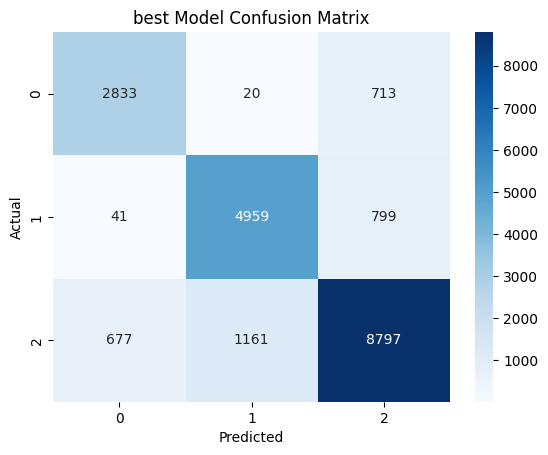

Test Accuracy: 0.82945


In [76]:
y_pred_havGCV = best_model_halving.predict(X_test)
print(classification_report(y_test, y_pred_havGCV))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_havGCV)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"best Model Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("Test Accuracy:", accuracy_score(y_test, y_pred_havGCV))

In [77]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model_halving, X, y, cv=5, scoring='accuracy')
print("Cross-validated accuracy scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validated accuracy scores: [0.694   0.70245 0.70525 0.69995 0.71055]
Mean accuracy: 0.70244


Random Forest AUC - ROC Score (ovr): 0.94


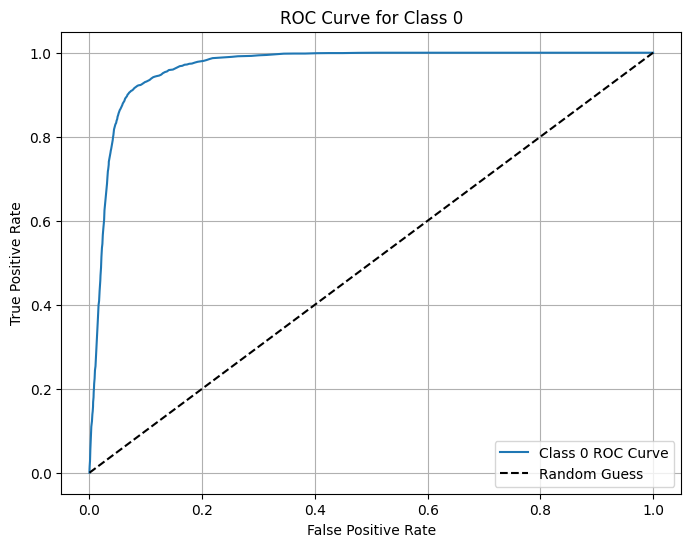

In [116]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Overall AUC-ROC Score for Random Forest
rf_roc_auc = roc_auc_score(y_test, halving_search.predict_proba(X_test), multi_class='ovr')
print(f"Random Forest AUC - ROC Score (ovr): {rf_roc_auc:.2f}")

# Select a specific class (e.g., class 0)
class_index = 0  # Change this index to plot a different class
class_label = halving_search.classes_[class_index]

# Compute FPR and TPR for that class
rf_fpr, rf_tpr, _ = roc_curve(y_test == class_label, halving_search.predict_proba(X_test)[:, class_index])

# Plot
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Class {class_label} ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for Class {class_label}')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [109]:
import joblib
# Save model
joblib.dump(best_model_halving, 'random_forest_credit_score_model_HalvingGridSearchCV.pkl')

['random_forest_credit_score_model_HalvingGridSearchCV.pkl']